In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# Column 0 for Jam result, Column 1 for dyLens 
subhalos = ["8", "11", "20", "56405", "56406", "83996", "313415"]
Nsubhalos = len(subhalos)  # Number of subhalos


Dstar  = np.empty([Nsubhalos,2])   # Fractional difference in stellar mass
Ddm    = np.empty([Nsubhalos,2])   # Fractional difference in dm mass
Dtotal = np.empty([Nsubhalos,2])   # Fractional difference in total mass
Dfdm   = np.empty([Nsubhalos,2])   # Fractional difference in dm fraction

In [3]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/JAM/Analysis/quantities.json".format(idNum)) as f:
        jam = json.load(f)
        f.close()

    with open("./{}/model1/phase5/Analysis/quantities.json".format(idNum)) as f:
        dyLens = json.load(f)
        f.close()
    
    Dstar[i][0] = jam["Dstar"]
    Dstar[i][1] = dyLens["Dstar"]
    
    Ddm[i][0] = jam["Ddm"]
    Ddm[i][1] = dyLens["Ddm"]
    
    Dtotal[i][0] = jam["Dtotal"]
    Dtotal[i][1] = dyLens["Dtotal"]
    
    Dfdm[i][0] = jam["Dfdm"]
    Dfdm[i][1] = dyLens["Dfdm"]
    

In [4]:
results = np.stack([Dstar, Ddm, Dtotal, Dfdm])

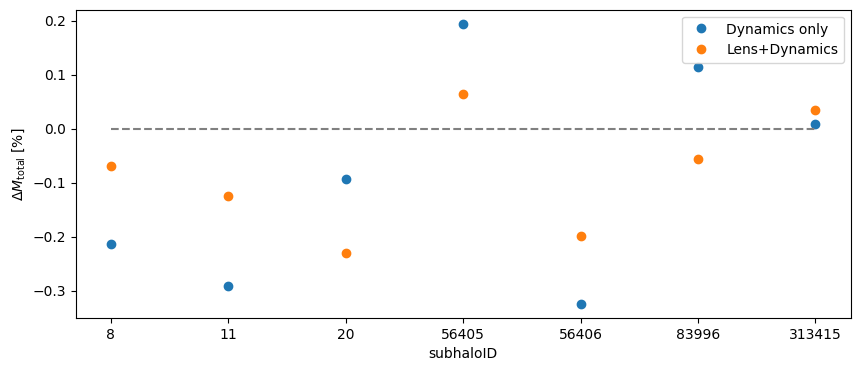

In [20]:
x = np.arange(0, Nsubhalos, 1)   # just to plot
plt.figure(figsize=(10,4))

plt.xticks(x, subhalos)
plt.plot(x, Dtotal[:,0], ".", label="Dynamics only", markersize=12)
plt.plot(x, Dtotal[:,1], ".", label="Lens+Dynamics", markersize=12)

plt.hlines(y=0, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")

plt.legend()
plt.ylabel(r"${\Delta M_{\rm total}}$ [%]")
plt.xlabel("subhaloID")
plt.show()

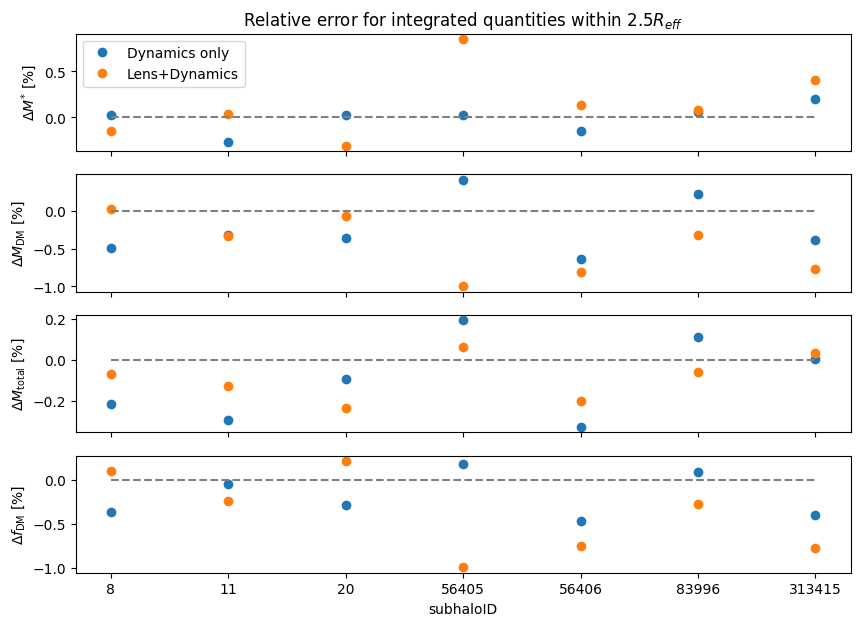

In [18]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
labels = [r"${\Delta M^{*}}$ [%]", r"${\Delta M_{\rm DM}}$ [%]",
         r"${\Delta M_{\rm total}}$ [%]", r"${\Delta f_{\rm DM}}$ [%]" ]


for i in range(len(labels)):
    ax = axes[i]
    ax.set_xticks(x, subhalos)
    ax.plot(x, results[i][:,0], ".", label="Dynamics only", markersize=12)
    ax.plot(x, results[i][:,1], ".", label="Lens+Dynamics", markersize=12)
    ax.hlines(y=0, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")
    ax.set_ylabel(labels[i])
    #ax.yaxis.set_label_coords(-0.1, 0.5)

axes[0].set_title("Relative error for integrated quantities within ${2.5 R_{eff}}$")
axes[0].legend()
axes[-1].set_xlabel("subhaloID");

---